<a href="https://colab.research.google.com/github/semant/finance/blob/master/Keras_01_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Project - Boston Housing

### Introduction

The Boston Housing database consists of 506 housing prices. Each house has 13 characteristics which is to be used to predict the house price. This analysis uses Keras with Tensorflow backend to predict the housing price. 

### Methodology
+ The 13 characteristics have different ranges of values, the values are initially scaled to improve model fit.
+ Different combination of dense layers are attempted to identify a combination that does not underfit or overfit the data.

### Conclusion
+ The optimal combination of dense layers consisted of 3 layers of 8, 8, and 16 nodes each. This resulted in an accuracy error in test data dropping from $23208.71 to $2838.70.
+ Changing the loss metric from MSE to MAE increased the loss, so, using MSE would be the recommended method.

In [0]:
! pip install Keras
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

from keras.datasets import boston_housing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Using TensorFlow backend.


(404, 13) (404,)
(102, 13) (102,)


### Scaling the input data
Only Training data is scaled, not Test data

In [0]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### Model # 1

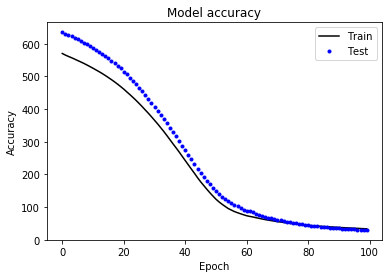

Train - Error in predicting housing prices went down from $569953.37 to $33441.82
Test  - Error in predicting housing prices went down from $634990.17 to $29984.52 



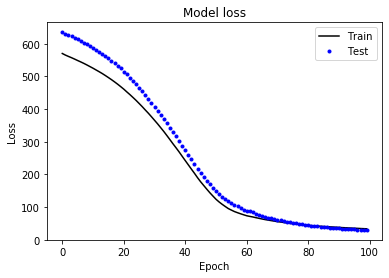

102/102 [==============================] - 0s 56us/step


[29.456298379337085, 29.456298828125]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100) 
# Plot training & validation accuracy values
plt.plot(history.history['mse'], 'k-')
plt.plot(history.history['val_mse'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mse'][0]*1000,2)
v2 = round(history.history['mse'][-1]*1000,2)
v3 = round(history.history['val_mse'][0]*1000,2)
v4 = round(history.history['val_mse'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

As the error is still decreasing for both train and test cases, the model is underfitting the data. As more data can not be added, adding more layer could help.

### Model # 2

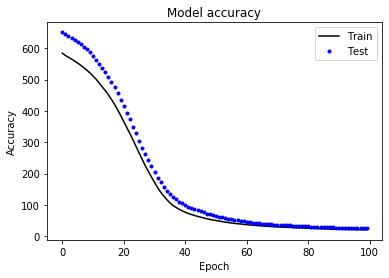

Train - Error in predicting housing prices went down from $584119.26 to $20174.12
Test  - Error in predicting housing prices went down from $650760.99 to $25267.22 



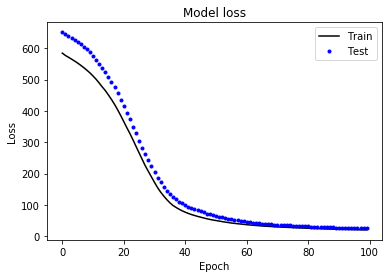

102/102 [==============================] - 0s 71us/step


[25.3950569302428, 25.395057678222656]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100) 
# Plot training & validation accuracy values
plt.plot(history.history['mse'], 'k-')
plt.plot(history.history['val_mse'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mse'][0]*1000,2)
v2 = round(history.history['mse'][-1]*1000,2)
v3 = round(history.history['val_mse'][0]*1000,2)
v4 = round(history.history['val_mse'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

As the error is still decreasing a little bit for both train and test cases, the model is slightly underfitting the data. As more data can not be added, adding more layer could help.

### Model # 3

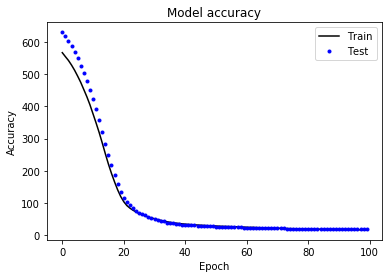

Train - Error in predicting housing prices went down from $567016.91 to $16037.34
Test  - Error in predicting housing prices went down from $630518.74 to $18229.68 



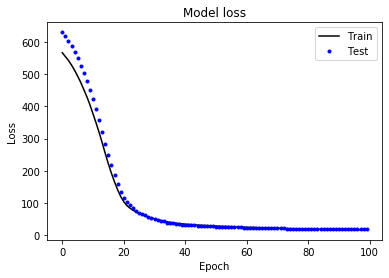

102/102 [==============================] - 0s 78us/step


[23.022257337383195, 23.02225685119629]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mse'], 'k-')
plt.plot(history.history['val_mse'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mse'][0]*1000,2)
v2 = round(history.history['mse'][-1]*1000,2)
v3 = round(history.history['val_mse'][0]*1000,2)
v4 = round(history.history['val_mse'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

As the accuracy or loss is no longer decreasing for both train and test cases, the model seems to be fitting the data just right. Still, to be sure, additional layers can be added to check for overfitting.

### Model # 4

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mse'], 'k-')
plt.plot(history.history['val_mse'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mse'][0]*1000,2)
v2 = round(history.history['mse'][-1]*1000,2)
v3 = round(history.history['val_mse'][0]*1000,2)
v4 = round(history.history['val_mse'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

KeyError: 'mse'

**Observation**

The accuracy or loss become bumpier as the number of epochs increase with a slight increase in error as well. This suggests that that model has started to overfit the data. One more test will be carried out to confirm overfitting.

### Model # 5

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mse'], 'k-')
plt.plot(history.history['val_mse'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mse'][0]*1000,2)
v2 = round(history.history['mse'][-1]*1000,2)
v3 = round(history.history['val_mse'][0]*1000,2)
v4 = round(history.history['val_mse'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

As the accuracy or loss is clearly increasing with a much bumpier accuracy as epochs increase, this means that the model is overfitting the data.

### Model # 6: Evaluating change in loss metric

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

Using the best fit model, if the accuracy metric was changed from MSE to MAE, the accuracy decreased a little bit. So, using MSE would be recommended as the loss metric.